In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

In [2]:
# add x0 = 1 to each instance
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.59829483],
       [ 2.88643631]])

In [3]:
# make predictions from the model above
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 =1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.59829483],
       [ 10.37116745]])

<function matplotlib.pyplot.show>

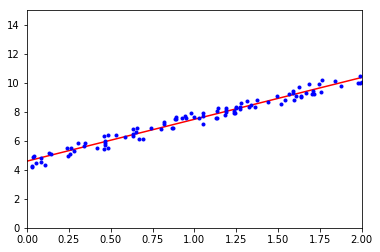

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show

In [5]:
# the equivalent code using sklearn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

/Users/PG/ml/env/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


array([[  4.59829483],
       [ 10.37116745]])

In [6]:
# implement Batch Gredient Descent
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

# random initialization
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[ 0.46334089],
       [-1.84944476]])

In [7]:
# implement Stochastic Gredient Descent
n_epochs = 50 
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        
theta

array([[-0.44801866],
       [ 1.81555584]])

In [8]:
# perform SGD using sklearn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

/Users/PG/ml/env/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([ 4.58843957]), array([ 2.87533374]))

<function matplotlib.pyplot.show>

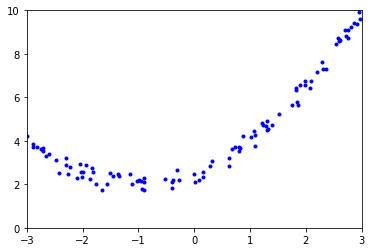

In [9]:
# polynomial regression
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.show

In [10]:
# add the square to each instance of X
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([-2.70233026,  7.30258882])

In [11]:
# fit LinearRegression model to the training data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.53614545]), array([[ 0.99182667,  0.49876778]]))

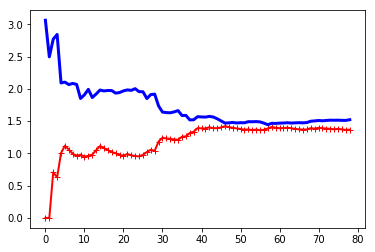

In [12]:
# plot a model's performence on training set and validation set as a function of training set size
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
# plot a linear model's learning curves    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

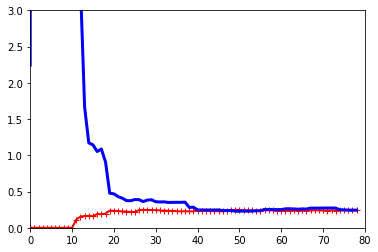

In [13]:
# plot a 10th-degree polynomial model
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])  
plt.show()

In [14]:
# perform Ridge Regression using scikit-learn by closed formed solution
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 5.77020186]])

In [15]:
# perform Ridge Regression using scikit-learn by SGD
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/Users/PG/ml/env/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 4.78685899])

In [16]:
# perform Lasso Regression using scikit-learn by close formed solution
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 5.35782117])

In [18]:
# perform Lasso Regression using SGD
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 4.3737169])

In [19]:
# perform Elastic Net using scikit-learn by close formed solution
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 4.97160619])

In [20]:
# impletation of early stopping
from sklearn.base import clone

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/Users/PG/ml/env/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


NameError: name 'X_train_poly_scaled' is not defined

In [25]:
# implement Logistic Regression using Iris dataset
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
iris = datasets.load_iris()
list(iris.keys())

['target_names', 'data', 'target', 'DESCR', 'feature_names']

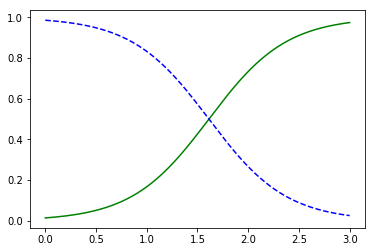

In [26]:
from sklearn.linear_model import LogisticRegression
X = iris["data"][:, 3:] # petal width
y = (iris["target"]==2).astype(np.int) # 1 if iris_virginica, else 0

# train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="iris_virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="not iris_virginica")
plt.show()

In [28]:
log_reg.predict([[1.7],[1.5],[2.3]])

array([1, 0, 1])

In [29]:
# impletation of Softmax regression
X = iris["data"][:,(2,3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)
softmax_reg.predict([[5,2]])

array([2])

In [31]:
softmax_reg.predict_proba([[5,2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])